0.31


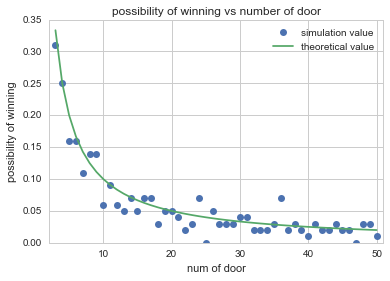

In [299]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline 
#this line above prepares IPython notebook for working with matplotlib

# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().

import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns #sets up styles and gives us more plotting options

class game(object):
    
    def __init__(self,nsim,num):
        self.nsim = nsim
        self.num = num
    
    def cash_door(self):
        return np.random.randint(0,self.num)

    def chosen_door(self):
        return np.random.randint(0,self.num)

    def open_door(self,chosend):
        a = np.arange(self.num)
        return a[(a!=chosend)][np.random.randint(0,self.num -1)]

    def change_notchange(self):
        return np.random.randint(0,2)

    def door_left(self,chosend,openedd):
        a = np.arange(self.num)    
        return a[(a!=chosend)&(a!=openedd)][np.random.randint(0,self.num -2)]

    def cal(self):

        win  = 0
        lose = 0
        chwin= 0
        unchwin = 0
        
        for i in range(self.nsim):
            chosen_d = self.chosen_door()
            cash_d   = self.cash_door()
            open_d   = self.open_door( chosen_d )
            
            if open_d == cash_d:
                lose += 1
            else:
                if self.change_notchange() == 1:
                    chosen_d = self.door_left( chosen_d,open_d )
                    if chosen_d == cash_d:
                        win += 1
                        chwin += 1
                    else:
                        lose += 1
                else:
                    if chosen_d == cash_d:
                        win += 1
                        unchwin += 1
                    else:
                        lose += 1
                    
        p = float(win)/self.nsim
        cp = float(chwin)/self.nsim
        ucp = float(unchwin)/self.nsim
        
        return p, cp, ucp


        #print "total game play = %d, win %d, lose %d"%(self.nsim, win, lose)
        #print "win after change = ", cp
        #print "win after unchange = ", ucp
        #print "The possibility of winning the game = ",p
        
nsim =100
num = 50
        
pobi = []
doornum = []
 
for n in range(3,num+1):
    gamen = game(nsim,n)
    pobi.append(gamen.cal()[0])
    doornum.append(n)

print pobi[0]

with sns.axes_style("whitegrid"):
    a = plt.plot(doornum,pobi, 'o', label='simulation value')
    b = plt.plot(doornum,[(1.0/i) for i in doornum], '-', label='theoretical value')
    #plt.axvline(meanrat, 0, 0.75, color='r', label='Mean')
    plt.xlabel("num of door")
    plt.ylabel("possibility of winning")
    plt.title("possibility of winning vs number of door")
    plt.legend()
    plt.xlim(2,n+1)
    plt.ylim(0)
    plt.show()



In [1]:
can you see me?
hey me i hate you rubbish

SyntaxError: invalid syntax (<ipython-input-1-69133530e5ae>, line 2)